# Crazy Taxi Data Exploration and Acquisition
Here we will explore the data sets obtained from http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml. This is data collected by the Taxi & Limo Commission on New York City taxis. 

There are three types of taxis in NYC. Yellow: these are your usual yellow taxis and are not restricted to pickup customers in any area. Green: these are called Boro Taxis and primarily service everything outside of downtown Manhattan and are not allowed to pick up in the Manhattan exclusionary zone. FHV (For-Hire-Vehicle): these are prearranged taxis all around NY through approved third party dispatchers.

Here is a map of the zones:
![Map of zones](map_service_area_map_thumbnail.jpg)
*Yellow area is the Manhatten exclusioary zone, green area is the area where both yellow and green taxis can pick up and drop off.(http://www.nyc.gov/html/tlc/html/passenger/shl_passenger.shtml)*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
from datetime import date
import calendar

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

## Loading the Data into pandas and Cleaning

In [3]:
yellow_data = pd.read_csv('TaxiData/yellow_tripdata_2016-06.csv', parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], \
                          date_parser=dateparse)
green_data = pd.read_csv('TaxiData/green_tripdata_2016-06.csv', parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime'], \
                         date_parser=dateparse)

In [3]:
print(type(yellow_data['tpep_dropoff_datetime'][0]))
yellow_data.info()

<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11135470 entries, 0 to 11135469
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(12), int64(4), object(1)
memory usage: 1.6+ GB


In [4]:
print(type(green_data['Lpep_dropoff_datetime'][0]))
green_data.info()

<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404726 entries, 0 to 1404725
Data columns (total 21 columns):
VendorID                 1404726 non-null int64
lpep_pickup_datetime     1404726 non-null datetime64[ns]
Lpep_dropoff_datetime    1404726 non-null datetime64[ns]
Store_and_fwd_flag       1404726 non-null object
RateCodeID               1404726 non-null int64
Pickup_longitude         1404726 non-null float64
Pickup_latitude          1404726 non-null float64
Dropoff_longitude        1404726 non-null float64
Dropoff_latitude         1404726 non-null float64
Passenger_count          1404726 non-null int64
Trip_distance            1404726 non-null float64
Fare_amount              1404726 non-null float64
Extra                    1404726 non-null float64
MTA_tax                  1404726 non-null float64
Tip_amount               1404726 non-null float64
Tolls_amount             1404726 non-null float64
Ehail_fee                0 non-null float

In [5]:
yellow_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


In [6]:
green_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-06-01 02:46:38,2016-06-01 03:06:40,N,1,-73.930580,40.695179,-74.000053,40.729046,1,...,19.5,0.5,0.5,6.24,0.0,NaN,0.3,27.04,1,1.0
1,2,2016-06-01 02:55:26,2016-06-01 03:06:52,N,1,-73.946930,40.792553,-73.951569,40.825161,1,...,11.5,0.5,0.5,2.56,0.0,NaN,0.3,15.36,1,1.0
2,2,2016-06-01 02:50:36,2016-06-01 03:08:39,N,1,-73.944534,40.823956,-73.994659,40.750423,1,...,23.5,0.5,0.5,2.00,0.0,NaN,0.3,26.80,1,1.0
3,2,2016-06-01 02:57:04,2016-06-01 03:07:52,N,1,-73.952209,40.823872,-73.914360,40.814697,1,...,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,2016-06-01 02:52:03,2016-06-01 03:08:12,N,1,-73.957977,40.717827,-73.954018,40.655121,3,...,16.5,0.5,0.5,0.00,0.0,NaN,0.3,17.80,1,1.0


Now that the data is added, any null values for pickup and dropoff location must be removed.

In [7]:
yellow_count_old = len(yellow_data.index)
green_count_old = len(green_data.index)

yellow_loc_lbls = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
green_loc_lbls = ['Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude']

yellow_data.dropna(subset=yellow_loc_lbls, inplace = True)
yellow_data.dropna(subset=['trip_distance'], inplace = True)

green_data.dropna(subset=green_loc_lbls, inplace = True)
green_data.dropna(subset=['Trip_distance'],inplace = True)

yellow_count_new = len(yellow_data.index)
green_count_new = len(green_data.index)
print("{0} rows removed from yellow data.".format(yellow_count_old-yellow_count_new))
print("{0} rows removed from green data.".format(green_count_old-green_count_new))

0 rows removed from yellow data.
0 rows removed from green data.


The clean data is explored for basic information

In [8]:
yellow_data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07
mean,1.529817e+00,1.657273e+00,3.044006e+00,-7.305081e+01,4.024282e+01,1.043880e+00,-7.312388e+01,4.028391e+01,1.349718e+00,1.350708e+01,3.407188e-01,4.973046e-01,1.842121e+00,3.402089e-01,2.996818e-01,1.683016e+01
std,4.991102e-01,1.302489e+00,2.183019e+01,8.208047e+00,4.521673e+00,5.660610e-01,7.880313e+00,4.341196e+00,4.944984e-01,2.755358e+02,5.339716e-01,4.451916e-02,2.713585e+00,1.719710e+00,1.358086e-02,2.758608e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.181863e+02,0.000000e+00,1.000000e+00,-1.181863e+02,0.000000e+00,1.000000e+00,-4.500000e+02,-4.123000e+01,-2.700000e+00,-6.770000e+01,-1.250000e+01,-3.000000e-01,-4.508000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399178e+01,4.073653e+01,1.000000e+00,-7.399123e+01,4.073492e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00
50%,2.000000e+00,1.000000e+00,1.710000e+00,-7.398135e+01,4.075358e+01,1.000000e+00,-7.397935e+01,4.075412e+01,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.230000e+01
75%,2.000000e+00,2.000000e+00,3.230000e+00,-7.396617e+01,4.076831e+01,1.000000e+00,-7.396202e+01,4.076954e+01,2.000000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.836000e+01
max,2.000000e+00,9.000000e+00,7.173270e+04,0.000000e+00,6.409648e+01,9.900000e+01,1.062469e+02,6.004071e+01,5.000000e+00,6.285447e+05,5.979200e+02,6.035000e+01,8.548500e+02,9.700000e+02,1.164000e+01,6.290338e+05


In [9]:
green_data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,0.0,1.404726e+06,1.404726e+06,1.404726e+06,1.404724e+06
mean,1.795140e+00,1.091790e+00,-7.382591e+01,4.068546e+01,-7.385015e+01,4.069769e+01,1.358612e+00,2.879364e+00,1.250718e+01,3.502088e-01,4.868255e-01,1.307438e+00,1.190993e-01,NaN,2.921007e-01,1.508798e+01,1.515029e+00,1.021310e+00
std,4.035993e-01,5.990534e-01,2.863031e+00,1.578683e+00,2.509123e+00,1.383819e+00,1.026833e+00,2.990728e+00,1.069113e+01,3.857585e-01,8.534602e-02,2.909235e+00,9.104712e-01,NaN,5.122782e-02,1.223701e+01,5.241456e-01,1.444165e-01
min,1.000000e+00,1.000000e+00,-7.591609e+01,0.000000e+00,-7.591550e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-4.500000e+00,-5.000000e-01,-1.320000e+01,-5.540000e+00,NaN,-3.000000e-01,-4.990000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.396138e+01,4.069402e+01,-7.396924e+01,4.069503e+01,1.000000e+00,1.070000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.190000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394639e+01,4.074594e+01,-7.394553e+01,4.074610e+01,1.000000e+00,1.900000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391862e+01,4.080157e+01,-7.391144e+01,4.078910e+01,1.000000e+00,3.600000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.232437e+01,0.000000e+00,4.232430e+01,9.000000e+00,2.681900e+02,3.347500e+03,4.500000e+00,5.000000e-01,3.000800e+02,9.800000e+01,NaN,3.000000e-01,3.349300e+03,5.000000e+00,2.000000e+00


For this project, the data was chosen from June 2016. This is the most recent data set that the New York City Taxi and Limo Comission used degrees for its pickup and dropoff locations. More recent data uses UTM, which requires conversion using GIS software. To keep the focus on data science, the June 2016 data was used. In addition to this, the conversion inculdes errors in calculation, so the degree data is also more accurate. Lasty, the FHV data does not include any pickup or dropoff location, so it is not usable for our purposes.

#### A bit more clean up
There are a few outliers on the coordinate data such as longitude/latitude 0 and negative values where there shouldn't be. Also removed are rows/columns where pickup or dropoff are outside city limits. Hopefully this cleans up the data for future use.


In [10]:
#yellow: 
yellow_data = yellow_data[(yellow_data['pickup_longitude'] >= -74.3) & (yellow_data['pickup_longitude'] <= -73.7) & 
                          (yellow_data['dropoff_longitude'] >= -74.3) & (yellow_data['dropoff_longitude'] <= -73.7) &
                          (yellow_data['pickup_latitude'] >= 40.48) & (yellow_data['pickup_latitude'] <= 41) & 
                          (yellow_data['dropoff_latitude'] >= 40.48) & (yellow_data['dropoff_latitude'] <= 41) &
                          (yellow_data['pickup_latitude'] != yellow_data['dropoff_latitude']) &
                          (yellow_data['pickup_longitude'] != yellow_data['dropoff_longitude'])]

#green:
green_data = green_data[(green_data['Pickup_longitude'] >= -74.3) & (green_data['Pickup_longitude'] <= -72.7) & 
                        (green_data['Dropoff_longitude'] >= -74.3) & (green_data['Dropoff_longitude'] <= -72.7) &
                        (green_data['Pickup_latitude'] >= 40.48) & (green_data['Pickup_latitude'] <= 41) & 
                        (green_data['Dropoff_latitude'] >= 40.48) & (green_data['Dropoff_latitude'] <= 41) &
                        (green_data['Pickup_latitude'] != green_data['Dropoff_latitude']) &
                        (green_data['Pickup_longitude'] != green_data['Dropoff_longitude'])]

yellow_data = yellow_data.sample(frac=.10, random_state=10)


#positive amounts
yellow_count_old = yellow_count_new
green_count_old = green_count_new
yellow_count_new = len(yellow_data.index)
green_count_new = len(green_data.index)
print("{0} rows removed from yellow data.".format(yellow_count_old-yellow_count_new))
print("{0} rows removed from green data.".format(green_count_old-green_count_new))

10043768 rows removed from yellow data.
8668 rows removed from green data.


#### Deriving trip duration
The trip duration can be found using the pickup time and dropoff time.

In [11]:
yellow_data['trip_duration'] = yellow_data['tpep_dropoff_datetime'] - yellow_data['tpep_pickup_datetime']

green_data['trip_duration'] = green_data['Lpep_dropoff_datetime'] - green_data['lpep_pickup_datetime']

In [12]:
yellow_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091702 entries, 8961577 to 5627004
Data columns (total 20 columns):
VendorID                 1091702 non-null int64
tpep_pickup_datetime     1091702 non-null datetime64[ns]
tpep_dropoff_datetime    1091702 non-null datetime64[ns]
passenger_count          1091702 non-null int64
trip_distance            1091702 non-null float64
pickup_longitude         1091702 non-null float64
pickup_latitude          1091702 non-null float64
RatecodeID               1091702 non-null int64
store_and_fwd_flag       1091702 non-null object
dropoff_longitude        1091702 non-null float64
dropoff_latitude         1091702 non-null float64
payment_type             1091702 non-null int64
fare_amount              1091702 non-null float64
extra                    1091702 non-null float64
mta_tax                  1091702 non-null float64
tip_amount               1091702 non-null float64
tolls_amount             1091702 non-null float64
improvement_surcharge    1

In [13]:
green_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396058 entries, 0 to 1404725
Data columns (total 22 columns):
VendorID                 1396058 non-null int64
lpep_pickup_datetime     1396058 non-null datetime64[ns]
Lpep_dropoff_datetime    1396058 non-null datetime64[ns]
Store_and_fwd_flag       1396058 non-null object
RateCodeID               1396058 non-null int64
Pickup_longitude         1396058 non-null float64
Pickup_latitude          1396058 non-null float64
Dropoff_longitude        1396058 non-null float64
Dropoff_latitude         1396058 non-null float64
Passenger_count          1396058 non-null int64
Trip_distance            1396058 non-null float64
Fare_amount              1396058 non-null float64
Extra                    1396058 non-null float64
MTA_tax                  1396058 non-null float64
Tip_amount               1396058 non-null float64
Tolls_amount             1396058 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1396058 non

### Saving a preliminary cleaned csv for ease of loading into memory.

In [14]:
yellow_data.to_csv("TaxiData/yellow_clean_2016-06.csv")
green_data.to_csv("TaxiData/green_clean_2016-06.csv")

#### Reload clean csv now that the initial cleaning is done.
This is mostly used for ease of reloading jupyter notebook and not having to clean the large data set everytime.

In [15]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

yellow_data = pd.read_csv("TaxiData/yellow_clean_2016-06.csv", parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], \
                          date_parser=dateparse)
green_data = pd.read_csv("TaxiData/green_clean_2016-06.csv", parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime'], \
                          date_parser=dateparse)

In [16]:
yellow_data['trip_duration'] = yellow_data['tpep_dropoff_datetime'] - yellow_data['tpep_pickup_datetime']

green_data['trip_duration'] = green_data['Lpep_dropoff_datetime'] - green_data['lpep_pickup_datetime']

### Observe new trip duration

In [17]:
yellow_data['trip_duration'].describe(percentiles=[.25,.5,.75,.85,.9])

count                   1091702
mean     0 days 00:16:57.038284
std      0 days 00:54:49.749736
min             0 days 00:00:00
25%             0 days 00:06:55
50%             0 days 00:11:37
75%             0 days 00:19:04
85%             0 days 00:24:41
90%             0 days 00:29:23
max             0 days 23:59:58
Name: trip_duration, dtype: object

The outliers from the data can be removed and the data converted to minutes.

In [18]:
yellow_data = yellow_data[(yellow_data['trip_duration'] >= timedelta(seconds=0)) & (yellow_data['trip_duration'] <= timedelta(hours=6))]

In [19]:
green_data['trip_duration'].describe()

count                   1396058
mean     0 days 00:23:36.673973
std      0 days 01:54:33.416025
min             0 days 00:00:00
25%             0 days 00:06:20
50%             0 days 00:10:39
75%             0 days 00:17:40
max             0 days 23:59:59
Name: trip_duration, dtype: object

In [20]:
green_data = green_data[(green_data['trip_duration'] >= timedelta(seconds=0)) & (green_data['trip_duration'] <= timedelta(hours=8))]

Now we convert the time deltas to minutes for correlation and counts.

In [21]:
yellow_data['trip_duration'] = yellow_data['trip_duration'].dt.seconds/60

In [22]:
green_data['trip_duration'] = green_data['trip_duration'].dt.seconds/60

In [23]:
yellow_data['trip_duration']

0          26.666667
1           3.416667
2          16.983333
3          30.300000
4           3.000000
5          15.600000
6          21.783333
7          11.350000
8           6.716667
9           8.316667
10          8.566667
11          2.783333
12         16.883333
13          9.600000
14         11.533333
15         21.633333
16          2.933333
17         14.516667
18          7.800000
19         13.266667
20         19.383333
21         12.450000
22         32.900000
23         16.983333
24         28.983333
25         10.333333
26          4.650000
27          2.833333
28          9.683333
29          7.266667
             ...    
1091672    27.200000
1091673    16.933333
1091674    14.383333
1091675     9.983333
1091676    15.783333
1091677    10.133333
1091678    18.033333
1091679     4.750000
1091680    24.733333
1091681    10.350000
1091682    28.066667
1091683    13.916667
1091684     2.183333
1091685    17.300000
1091686    20.250000
1091687    25.416667
1091688    16

In [24]:
yellow_data['trip_day']= yellow_data['tpep_pickup_datetime'].dt.day
yellow_data['trip_hour'] = yellow_data['tpep_pickup_datetime'].dt.hour

In [25]:
green_data['trip_day']= green_data['lpep_pickup_datetime'].dt.day
green_data['trip_hour'] = green_data['lpep_pickup_datetime'].dt.hour

## Some visualization
Here we are going to visulaize the data and see if we can notice any patterns.

### Correlation Matrix and Heatmap

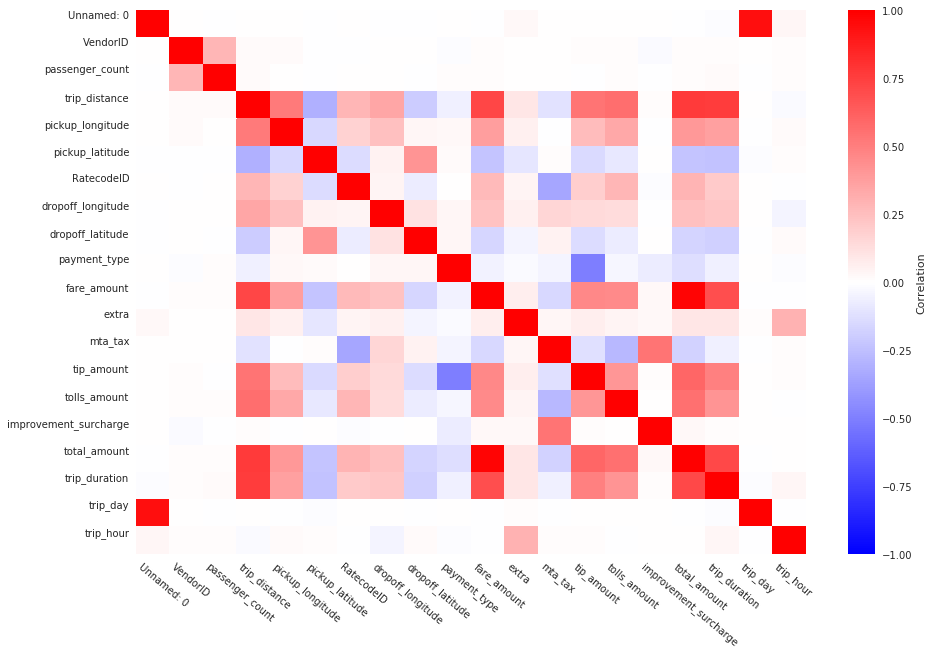

In [26]:
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline  
plt.rcParams['figure.figsize'] = (15, 10)

fig, ax = plt.subplots()

corr_mat = yellow_data.corr()

heatmap = ax.pcolor(corr_mat, cmap='bwr', vmin=-1, vmax=1)
ax.set_xticks(np.arange(corr_mat.shape[0] +.5));
ax.set_yticks(np.arange(corr_mat.shape[1] +.5));
ax.invert_yaxis()

#labels
col_lbl = corr_mat.columns
row_lbl = corr_mat.index
ax.set_xticklabels(col_lbl, rotation=-40,  ha='left');
ax.set_yticklabels(row_lbl, va='top');

cbar = plt.colorbar(heatmap)
cbar.set_label('Correlation')

Nothing of any particular interest. maybe scaling will help more.

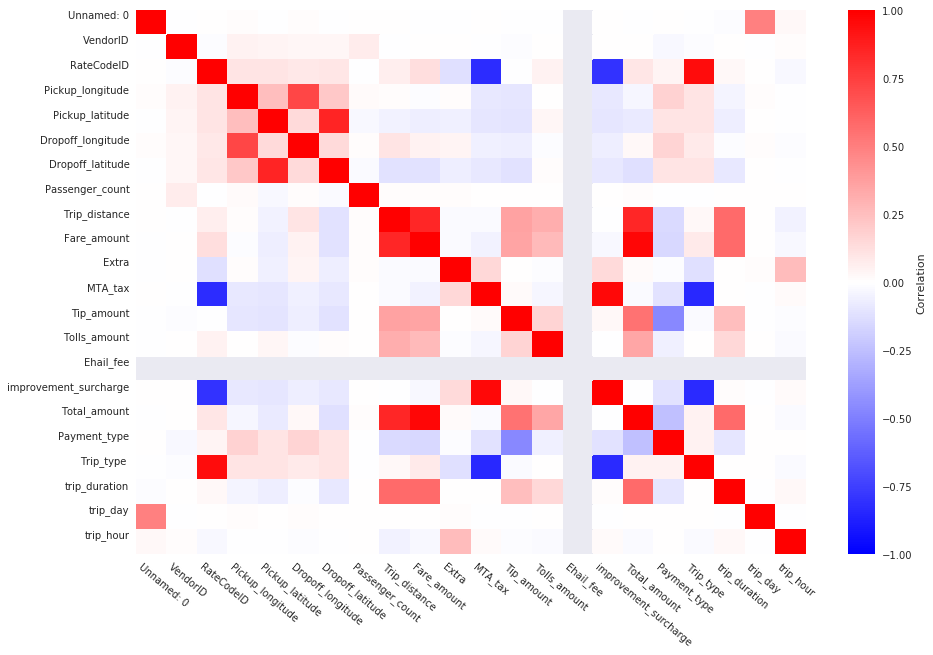

In [27]:
fig, ax = plt.subplots()

corr_mat = green_data.corr()

heatmap = ax.pcolor(corr_mat, cmap='bwr', vmin=-1, vmax=1)
ax.set_xticks(np.arange(corr_mat.shape[0] +.5));
ax.set_yticks(np.arange(corr_mat.shape[1] +.5));
ax.invert_yaxis()

#labels
col_lbl = corr_mat.columns
row_lbl = corr_mat.index
ax.set_xticklabels(col_lbl, rotation=-40,  ha='left');
ax.set_yticklabels(row_lbl, va='top');

cbar = plt.colorbar(heatmap)
cbar.set_label('Correlation')

#### Interpretation
You can see here that there is a decent correlation between pickup location and dropoff location this may be due to the fact that the numbers for the coordinates are so small compared to each other but we will find out. 

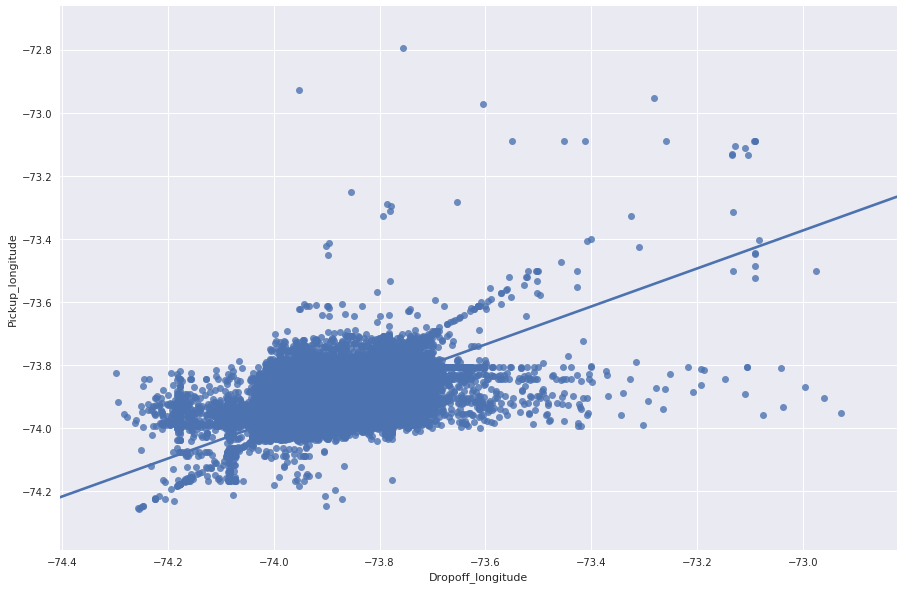

In [28]:
sns.regplot(x=green_data['Dropoff_longitude'], y=green_data['Pickup_longitude'])

The Regression plot does not show any useful information

# Geo plots and counts
First we will look at the location data and datetime data to try and find any outliers. Below is a plot of the data on a physical map, just to get an idea of what this looks like. The black triangles are dropoffs, and the blue hexagons are pickups


In [50]:
import folium
from folium import plugins

ny = folium.Map([40.7831, -73.9712], zoom_start = 12, tiles='openstreetmap')

yellow_pickup_lat = yellow_data['pickup_latitude']
yellow_pickup_long = yellow_data['pickup_longitude']

yellow_dropoff_lat = yellow_data['dropoff_latitude']
yellow_dropoff_long = yellow_data['dropoff_longitude']
                                 
idx_array = np.linspace(0, len(yellow_pickup_lat), num=100, dtype=int)
for i in idx_array:
    folium.RegularPolygonMarker([yellow_pickup_lat[i], yellow_pickup_long[i]], fill_color='#43d9de',number_of_sides=6,radius=3).add_to(ny)
    folium.RegularPolygonMarker([yellow_dropoff_lat[i], yellow_dropoff_long[i]], fill_color='#769d96',number_of_sides=3,radius=3).add_to(ny)
ny


### Geo Plot and Count Plots
This process can be repeated, using only the pickup and dropoff locations themselves. The pickup and dropoff maps are very similar, but it can be said that the yellow taxis drop off a lot outside Manhattan and the green taxis drop off a lot within Manhattan

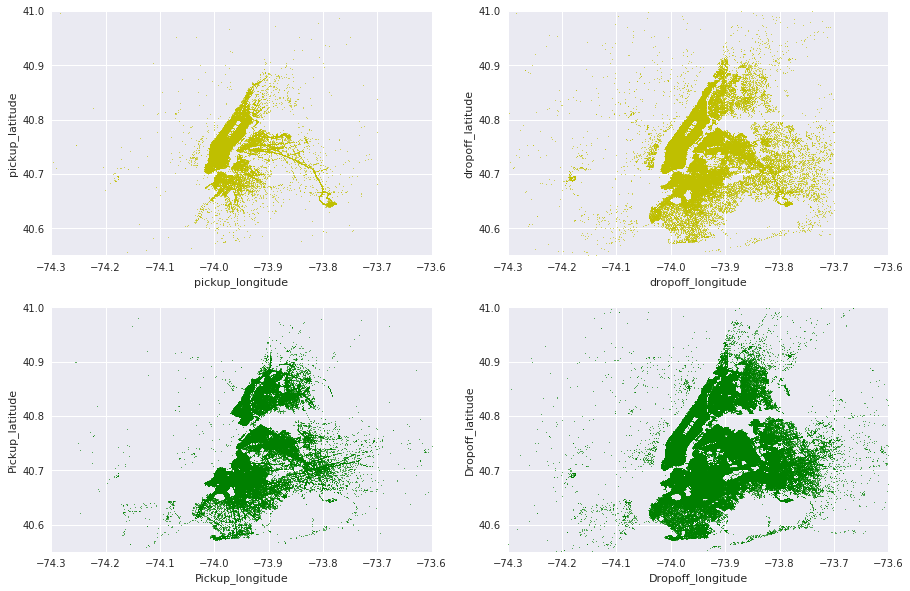

In [53]:
fig1 = plt.figure()
fig1.add_subplot(2,2,1)
sns.regplot(yellow_data['pickup_longitude'], yellow_data['pickup_latitude'], data=yellow_data, fit_reg=False,color='y', \
            scatter_kws = {'s':1})
fig1.add_subplot(2,2,2)
sns.regplot(yellow_data['dropoff_longitude'], yellow_data['dropoff_latitude'], data=yellow_data, fit_reg=False,color='y', \
            scatter_kws = {'s':1})
fig1.add_subplot(2,2,3)
sns.regplot(green_data['Pickup_longitude'], green_data['Pickup_latitude'], data=green_data, fit_reg=False, color = 'g',  \
            scatter_kws = {'s':1})
fig1.add_subplot(2,2,4)
sns.regplot(green_data['Dropoff_longitude'], green_data['Dropoff_latitude'], data=green_data, fit_reg=False,color='g', \
            scatter_kws = {'s':1})
for ax in fig1.axes:
    ax.set_xlim(left=-74.3, right=-73.6)
    ax.set_ylim(bottom=40.55, top=41)
    ax.set_aspect('equal')

plt.show()

Now, the data may be broken up into day of the month, day of the week, and hour of the day.

[Text(474.652,0.5,'Trips'), Text(0.5,18.1063,'Day')]

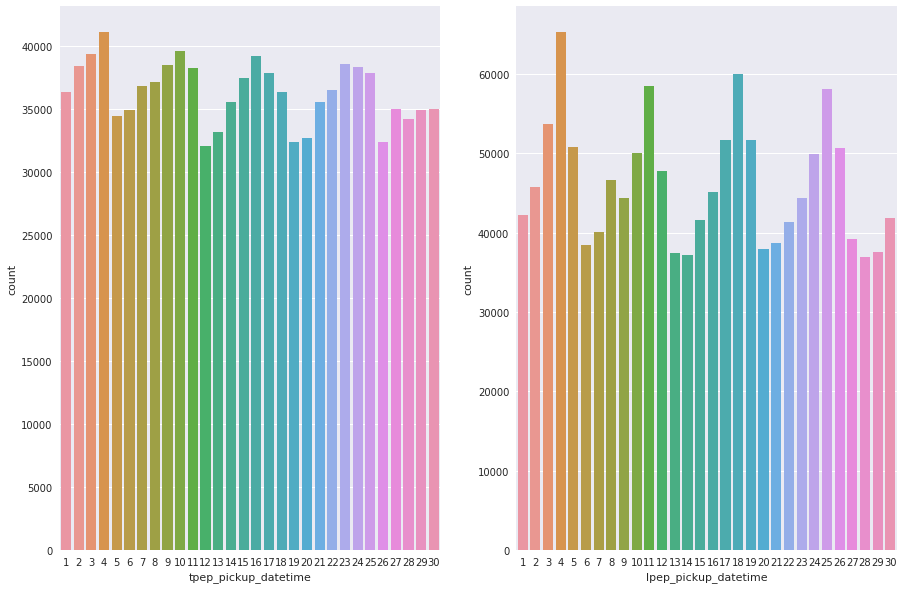

In [52]:
fig = plt.figure()
fig.add_subplot(1,2,1)
sns.countplot(x=yellow_data['tpep_pickup_datetime'].dt.day)
fig.add_subplot(1,2,2)
sns.countplot(x=green_data['lpep_pickup_datetime'].dt.day)
ax.set(xlabel="Day", ylabel="Trips")

As shown both above and below, yellow taxis are used most in the middle of the week and green taxis are used most at the end of the week.

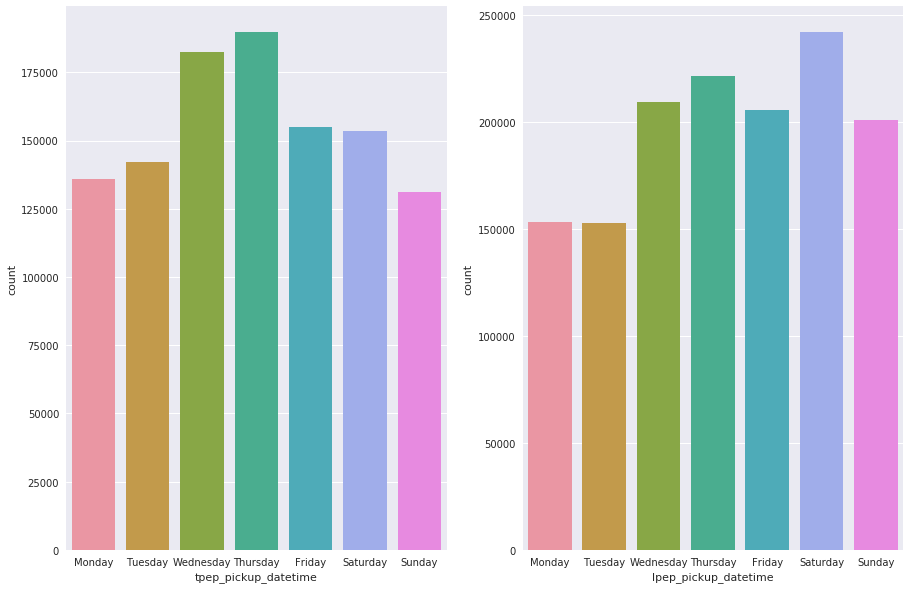

In [54]:
fig = plt.figure()
fig.add_subplot(1,2,1)
sns.countplot(x=yellow_data['tpep_pickup_datetime'].dt.dayofweek)
fig.add_subplot(1,2,2)
sns.countplot(x=green_data['lpep_pickup_datetime'].dt.dayofweek)
for ax in fig.axes:
    ax.set_xticklabels(list(calendar.day_name));

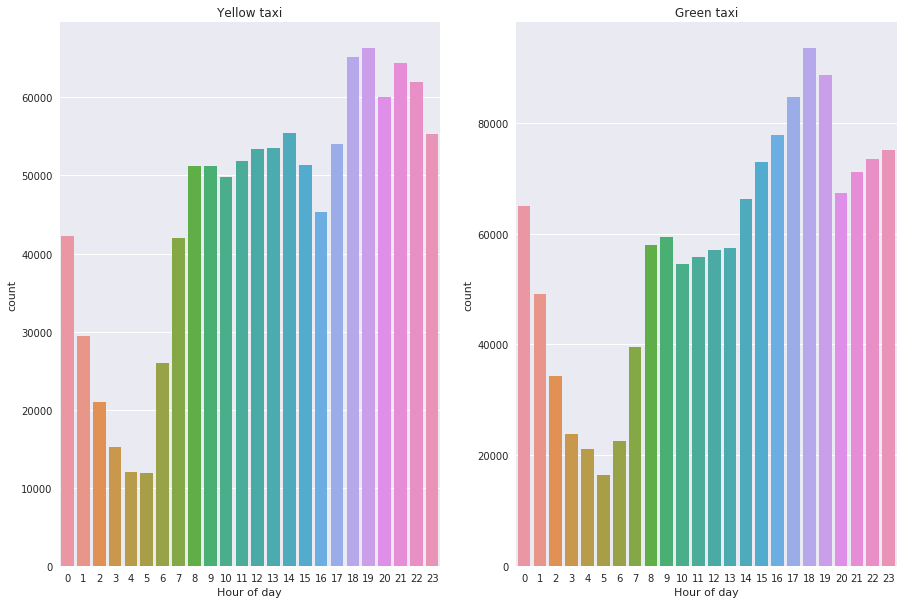

In [55]:
fig = plt.figure()
fig.add_subplot(1,2,1)
sns.countplot(yellow_data['tpep_pickup_datetime'].dt.hour)
fig.add_subplot(1,2,2)
sns.countplot(green_data['lpep_pickup_datetime'].dt.hour)
fig.axes[0].set(title='Yellow taxi')
fig.axes[1].set(title='Green taxi')
for ax in fig.axes:
    ax.set_xlabel('Hour of day')

The taxi use increases a large amount in the morning due to communters, but the heaviest use is around 7 PM, most likely for night life. Note how the green pickups decrease around 11, the same time that yellow taxi use increases.

### Geo Plot Heatmap
The most popular pickups and dropoffs can be visualized using a heat map. 

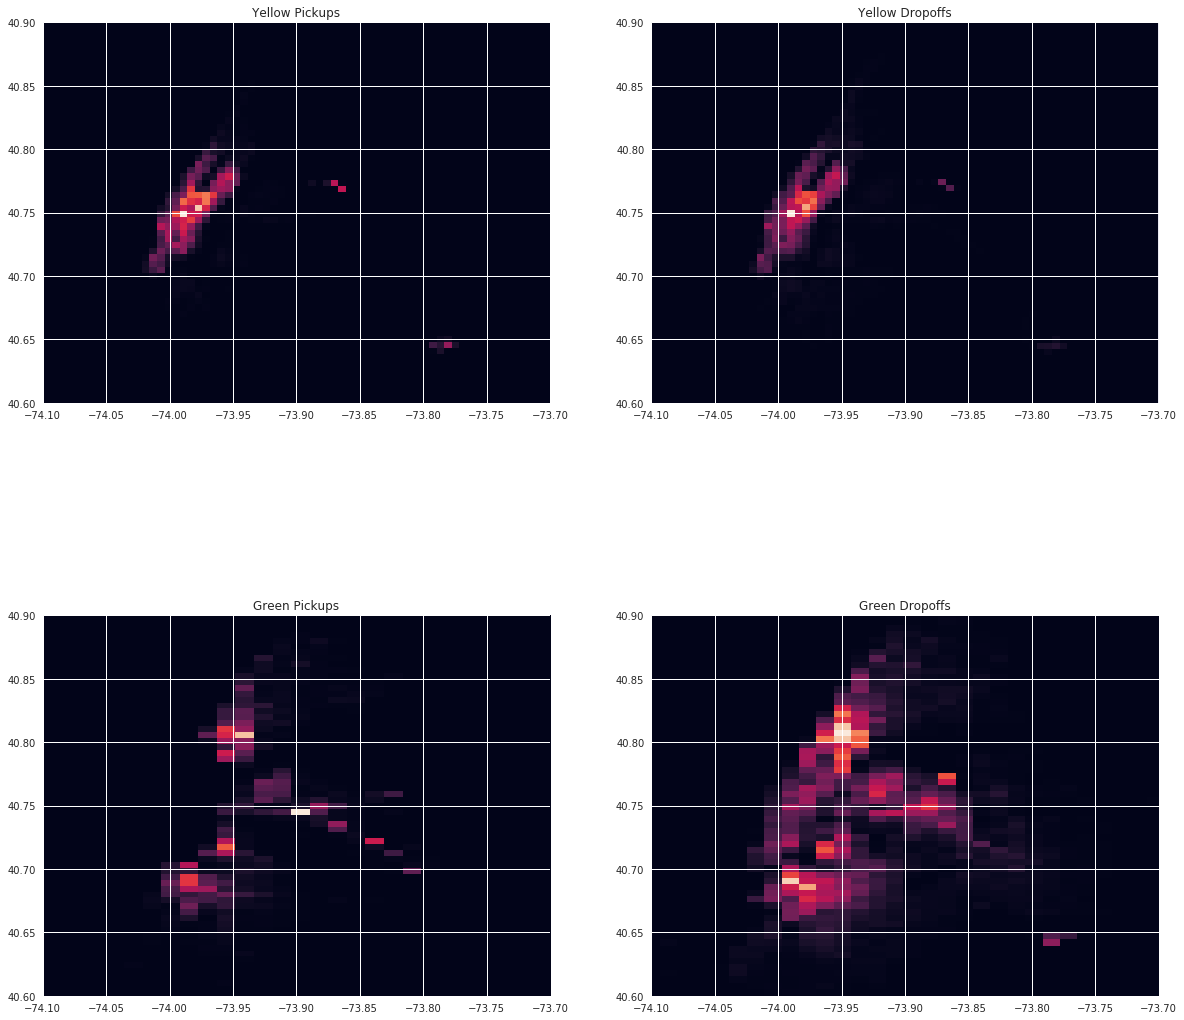

In [56]:
heat_yp, xedges_yp, yedges_yp = np.histogram2d(yellow_data['pickup_longitude'], yellow_data['pickup_latitude'], bins=100)
heat_yd, xedges_yd, yedges_yd = np.histogram2d(yellow_data['dropoff_longitude'], yellow_data['dropoff_latitude'], bins=100)
heat_gp, xedges_gp, yedges_gp = np.histogram2d(green_data['Pickup_longitude'], green_data['Pickup_latitude'], bins=100)
heat_gd, xedges_gd, yedges_gd = np.histogram2d(green_data['Dropoff_longitude'], green_data['Dropoff_latitude'], bins=100)

extent_yp = [xedges_yp[0], xedges_yp[-1], yedges_yp[0], yedges_yp[-1]]
extent_yd = [xedges_yd[0], xedges_yd[-1], yedges_yd[0], yedges_yd[-1]]
extent_gp = [xedges_gp[0], xedges_gp[-1], yedges_gp[0], yedges_gp[-1]]
extent_gd = [xedges_gd[0], xedges_gd[-1], yedges_gd[0], yedges_gd[-1]]

fig1 = plt.figure(figsize = (20,20))
fig1.add_subplot(2,2,1)
#heat_yp = sns.jointplot(yellow_data['pickup_longitude'],yellow_data['pickup_latitude'], kind = 'hex')
plt.imshow(heat_yp.T, extent = extent_yp, origin='lower')
plt.title('Yellow Pickups')

fig1.add_subplot(2,2,2)
plt.imshow(heat_yd.T, extent = extent_yd, origin='lower')
plt.title('Yellow Dropoffs')

fig1.add_subplot(2,2,3)
plt.imshow(heat_gp.T, extent = extent_gp ,origin='lower')
plt.title('Green Pickups')

fig1.add_subplot(2,2,4)
plt.imshow(heat_gd.T, extent = extent_gd, origin='lower')
plt.title('Green Dropoffs')


for ax in fig1.axes:
    ax.set_xlim(left=-74.1, right=-73.7)
    ax.set_ylim(bottom=40.6, top=40.9)
    ax.set_aspect('equal')

![HeatMap](./heatmap.png)

In [108]:
heat_yp_flat = heat_yp.flatten()
for i in range(2):
    best_yellow_pick = np.argmax(heat_yp_flat)
    best_yellow_pick_idx = np.unravel_index(best_yellow_pick, heat_yp.shape)
    print('Yellow Pickups: ', yedges_yp[best_yellow_pick_idx[1]],',', xedges_yp[best_yellow_pick_idx[0]])
    heat_yp_flat[best_yellow_pick] = 0;
print()    
    
heat_yd_flat = heat_yd.flatten()
for i in range(2):
    best_yellow_drop = np.argmax(heat_yd_flat)
    best_yellow_drop_idx = np.unravel_index(best_yellow_drop, heat_yd.shape)
    print('Yellow Dropoffs: ', yedges_yd[best_yellow_drop_idx[1]],',', xedges_yd[best_yellow_drop_idx[0]])
    heat_yd_flat[best_yellow_drop] = 0;
print()  

heat_gp_flat = heat_gp.flatten()
for i in range(2):
    best_green_pick = np.argmax(heat_gp_flat)
    best_green_pick_idx = np.unravel_index(best_green_pick, heat_gp.shape)
    print('Green Pickups: ', yedges_gp[best_green_pick_idx[1]],',', xedges_gp[best_green_pick_idx[0]])
    heat_gp_flat[best_green_pick] = 0;
print()    
    
heat_gd_flat = heat_gd.flatten()
for i in range(2):
    best_green_drop = np.argmax(heat_gd_flat)
    best_green_drop_idx = np.unravel_index(best_green_drop, heat_gd.shape)
    print('Green Dropoffs: ', yedges_gd[best_green_drop_idx[1]],',', xedges_gd[best_green_drop_idx[0]])
    heat_gd_flat[best_green_drop] = 0;    
    

Yellow Pickups:  40.74640132904053 , -73.99229209899903
Yellow Pickups:  40.75131034851074 , -73.98037818908692

Yellow Dropoffs:  40.746858482360835 , -73.9927799987793
Yellow Dropoffs:  40.751821517944336 , -73.98084243774414

Green Pickups:  40.742728004455564 , -73.90456420898437
Green Pickups:  40.803170089721675 , -73.94841888427734

Green Dropoffs:  40.80495986938476 , -73.95608139038086
Green Dropoffs:  40.6883088684082 , -73.99720184326172


The yellow data does not reveals that the most popular pickups are Penn Station and Grand Central station. The most propular yellow dropoffs are Penn Station and the New York Public Library. The map also reveals that the yellow taxis are used primarily within downtown New York. The green data indicates that people start and end in mostly a handful of locations, notably Central Park Station and Woodside station for pickups, and the Cobble Hill neighborhood and Central Park Station for pickups.  
For the most part, it can be said that taxis in New York City are used to get to or from a train station.